In [19]:
import TestFunctions as tf
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from importlib import reload
import random as r
import time
import matplotlib.animation as animation
import math

In [9]:
class Solution:
    def __init__(self, dimension, lower_bound, upper_bound):
        self.d = dimension
        self.lower = lower_bound # we will use the same bounds for all parameters
        self.upper = upper_bound
        self.params = np.zeros(self.d) #solution parameters
        self.f = np.inf # objective function evaluation

In [60]:
def SimulatedAnnealing(solution, func):
    T0 = 100
    TMin = 0.5
    alpha = 0.95
    T = T0
    for i in range(0,len(solution.params)):
        solution.params[i] = r.uniform(solution.lower, solution.upper) # Generate random coordinates for the first time
    z = func(tuple(i for i in solution.params)) # Get value of function in generated point on graph
    minZ = z
    bestParams = solution.params.copy()
    standardDeviation = 1 # For normal distribution of data, values within standard deviation of 2 account for about 95% of values 
    snaps = []
    snaps.append((solution.params.copy()[0], solution.params.copy()[1], z)) # Save first point
    while T > TMin:# Stop generation of new points when function value hasnt improved in 1000 tries
        for i in range(0,len(solution.params)):
            solution.params[i] = np.random.normal(bestParams[i], standardDeviation)# generate neighbor based on current solution
        z = func(tuple(i for i in solution.params))
        if minZ > z:
            minZ = z
            bestParams = solution.params.copy()
            snaps.append((solution.params.copy()[0], solution.params.copy()[1], z))
        else:
            rc = np.random.uniform(solution.lower, solution.upper)
            if rc < pow(math.e, -(z - minZ)/T):
                minZ = z
                bestParams = solution.params.copy()
                snaps.append((solution.params.copy()[0], solution.params.copy()[1], z))
        T = T * alpha
    print(bestParams)
    solution.params = bestParams
    return (solution,snaps)# Return tuple with solution at index [0] and list of coordinates (x,y,z) for points at index [1]

In [46]:
def plot3DWithAnimation(xRangeMin, xRangeMax, yRangeMin, yRangeMax, func, params, gifName):
    x = np.linspace(xRangeMin, xRangeMax, 30)
    y = np.linspace(yRangeMin, yRangeMax, 30)
    #x = np.concatenate((x[x<0], [0], x[x>0]))#insert [0,0], doesnt work neither
    #y = np.concatenate((y[y<0], [0], y[y>0]))
    X, Y = np.meshgrid(x, y)
    Z = func((X, Y))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='magma', edgecolor='none', zorder=1, alpha=0.4)
    ax.set_title(func.__name__)
    ax.set_zlim(0, Z.max())
    scatter = ax.scatter([], [], [], color='red', s=100, zorder=4)  # Placeholder for the scatter plot
    # Function thats gonna be called by FuncAnimation at every interval
    def animate(i):
        x = [params[i][0]]  
        y = [params[i][1]]  
        z = [params[i][2]]
        scatter._offsets3d = (x, y, z)  # Update the scatter plot data
        plt.pause(0.2) # Pause plotting for smoother animation
    ani = animation.FuncAnimation(fig, animate, repeat=True, frames=len(params), interval=1000) # Generate animation
    
    writer = animation.PillowWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
    ani.save(gifName, writer=writer) # Save animation -> plt.show() of Gif seems to display just one frame in Jupyter notebook, viewing gif file seperately shows entire animation
    
    plt.show()

[-3.7709041  -2.80636589]


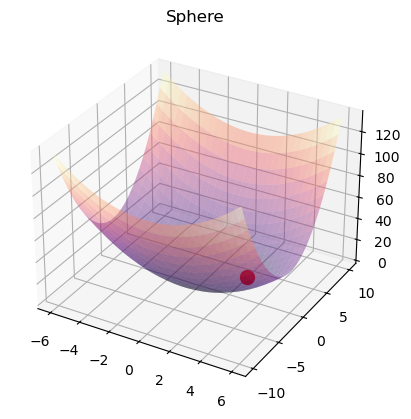

In [48]:
funcs = tf.getAllFunctions()
x = Solution(2,funcs[0][1],funcs[0][0])
func = funcs[0][4]
result = SimulatedAnnealing(x,func)
x = result[0]
func = funcs[0]
params = result[1]
plot3DWithAnimation(func[0],func[1],func[2],func[3],func[4],params,'SphereAnnealing.gif')

In [51]:
params

[(4.822067498563392, -5.041135123469867, 48.66537829378296),
 (3.671921265932899, -3.091639370098215, 23.041239777951553),
 (2.1762748097382616, -6.857542734665149, 51.76206440526007),
 (2.033704722573598, -5.167969311531452, 30.84386170354902),
 (2.170503638982886, -3.70317630533295, 18.424600795217348),
 (4.309554727478616, -6.11264178980245, 55.93665159957259),
 (3.2505249061573527, -5.942575311784673, 45.88011350178197),
 (3.357145655670897, -0.7901848520834767, 11.894819053852164),
 (2.2984872493416173, 0.08971708582815274, 5.2910927908754894),
 (-0.40096330094638066, -1.6540069491757459, 2.8965105566274763),
 (0.3256092154742777, -1.9475002491324283, 3.8987785815726443),
 (-2.754243585271823, 0.04466991067677406, 7.587853127930855),
 (-2.303532174183337, 2.500852659385285, 11.560524501452264),
 (-1.69963205281661, 2.312970217622378, 8.238580342569714),
 (-1.5146375604876976, 3.3550687156179597, 13.55061302615847),
 (-1.1912672523405867, 3.1229025228750795, 11.171637833878627),
 (

[11.96815884 10.1754461 ]


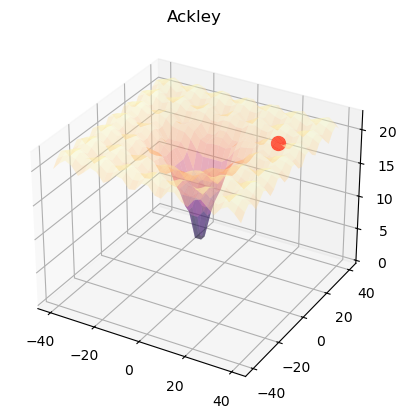

In [62]:
funcs = tf.getAllFunctions()
x = Solution(2,funcs[1][1],funcs[1][0])
func = funcs[1][4]
result = SimulatedAnnealing(x,func)
x = result[0]
func = funcs[1]
params = result[1]
plot3DWithAnimation(func[0],func[1],func[2],func[3],func[4],params,'AckleyAnnealing.gif')

In [65]:
params

[(27.36797292841051, 11.779678525386558, 21.63967474492985),
 (26.618549115897334, 12.817855579748429, 21.560293484993018),
 (26.853073555711582, 12.542189543499811, 21.581251207884478),
 (25.502269507179644, 13.060064067508502, 21.40505193408625),
 (25.446501211683962, 14.044692576033395, 21.381830506980467),
 (23.70759125578172, 13.410188750479055, 21.718958650073855),
 (25.081873623761442, 11.801944209048163, 20.507420333856988),
 (24.84354145870253, 12.375898544556616, 21.398839158207235),
 (24.009376566918327, 12.5294425943838, 21.276387340552365),
 (24.058022663729798, 12.738939039214184, 20.751646068981824),
 (23.766410745637213, 10.69985919820323, 21.315131321908368),
 (24.663610419309517, 11.502070410787542, 21.82359991233292),
 (24.893668283660936, 11.332160128564949, 21.14347700202748),
 (23.29441494985037, 11.79547269429679, 21.216939747768144),
 (21.70596877553754, 12.92908976166095, 20.787105832361384),
 (21.839242664554956, 13.34692729950297, 21.202366362115566),
 (23.41